In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [5]:
def read_data():
    with np.load("../mnist.npz") as f:
        x, y = f["x_train"], f["y_train"]
        x = x.astype("float32")/255
        x = np.reshape(
            x,
            (x.shape[0], x.shape[1] * x.shape[2]),
        )
        y = np.eye(10)[y]
        return x, y

In [6]:
read_data()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
with np.load("../mnist.npz") as f:
        x_train, y_train = f["x_train"], f["y_train"]
        x_train = x_train.astype("float32")/255
        x_train = np.reshape(
            x_train,
            (x_train.shape[0], x_train.shape[1] * x_train.shape[2]),
        )
        y_train = np.eye(10)[y_train]

In [9]:
# x_train, y_train = read_data()
epochs = 5
learning_rate = 0.01
nr_correct = 0

In [10]:
w1 = np.random.uniform(-0.5, 0.5, (20, 784))
w2 = np.random.uniform(-0.5, 0.5, (10, 20))
b1 = np.random.rand(20, 1)
b2 = np.random.rand(10, 1)

In [11]:
def forward_prop(x):
    z1 = w1.dot(x) + b1
    h = sigmoid(z1)
    z2 = w2.dot(h) + b2
    o = sigmoid(z2)

    return np.argmax(o), round(float(o[np.argmax(o)]), 3)

In [42]:
'''train'''

for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
        x.shape += (1,)
        y.shape += (1,)
        
        z1 = w1.dot(x) + b1
        h = sigmoid(z1)
        z2 = w2.dot(h) + b2
        o = sigmoid(z2)
        
        err = np.mean((o - y)**2)
        nr_correct += int(np.argmax(o) == np.argmax(y))
        
        _err = 2 * (o - y)
        _sig_o = o * (1 - o)
        _wei = h
        
        loss_o_w = np.dot((_err * _sig_o), np.transpose(h))
        loss_o_b = _err * _sig_o
        
        w2 -= learning_rate * loss_o_w
        b2 -= learning_rate * loss_o_b
        
        _sig_h = h * (1-h)
        loss_h_w = np.dot(np.transpose(w2).dot(_err * _sig_o) * _sig_h, np.transpose(x))
        loss_h_b = np.transpose(w2).dot(_err * _sig_o) * _sig_h
        
        w1 -= learning_rate * loss_h_w
        b1 -= learning_rate * loss_h_b
        
    print(f"Epoch {epoch} Training Acc: {round((nr_correct / x_train.shape[0]) * 100, 2)}%")
    nr_correct = 0

Epoch 0 Training Acc: 94.39%
Epoch 1 Training Acc: 94.5%
Epoch 2 Training Acc: 94.66%
Epoch 3 Training Acc: 94.83%
Epoch 4 Training Acc: 94.95%


In [13]:
k = x_train[4]
k.shape += (1,)

In [14]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

In [15]:
def open_image(path):
    im = Image.open(path)
    pix_val = list(im.getdata())
    pix_val = [math.ceil((i+j+k)/3) for (i, j, k) in pix_val]
    x = np.matrix(pix_val).reshape(784,1)
    x = x.astype("float32") / 255
    
    return x

In [16]:
t = open_image("../images/8.png")
t = t.reshape(784,1)

<module 'matplotlib.pyplot' from '/home/anupam/work/playground/web/image-classifier/ai-service/libs/lib/python3.10/site-packages/matplotlib/pyplot.py'>

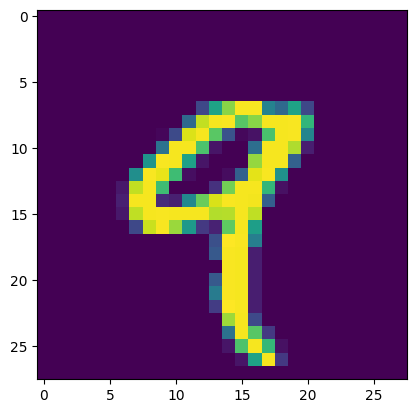

In [17]:
gen_image(k)

<module 'matplotlib.pyplot' from '/home/anupam/work/playground/web/image-classifier/ai-service/libs/lib/python3.10/site-packages/matplotlib/pyplot.py'>

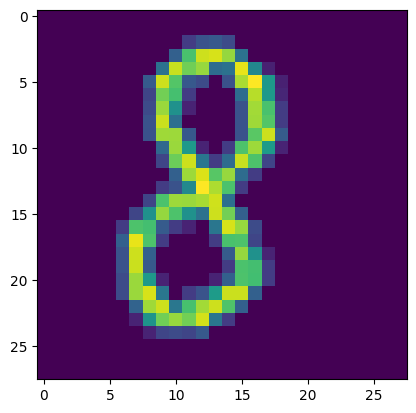

In [18]:
gen_image(t)

In [45]:
forward_prop(t)

(8, 0.51)

<module 'matplotlib.pyplot' from '/home/anupam/work/playground/web/image-classifier/ai-service/libs/lib/python3.10/site-packages/matplotlib/pyplot.py'>

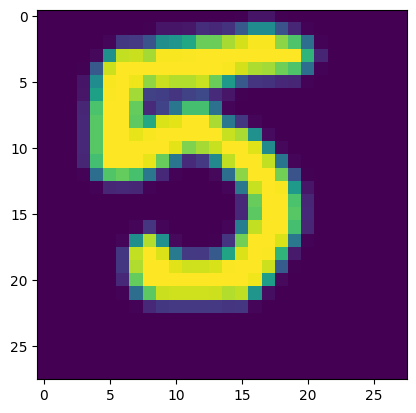

In [39]:
t2 = open_image("../images/5.png")
t2 = t2.reshape(784,1)
gen_image(t2)

In [43]:
forward_prop(t2)

(7, 0.743)